## Deep Learning -  Iris Flower Dataset for Building Classification Model

### 5.1 Setup 

In [3]:
# Install libraries
!pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   -------------------- ------------------- 4.7/9.3 MB 25.9 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.3 MB 25.9 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 22.2 MB/s eta 0:00:00


## Prepare Input Data for Deep Learning
1. Load data into pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets

In [9]:
import pandas as pd 
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Data and review content
iris_data = pd.read_csv('Iris.csv')

print("\nLoaded Data: \n------------------------")
print(iris_data.head())

# Use a label encoder to convert string to numeric values
# for the target varaible

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
    iris_data['Species'])

# Convert input to numpy array
np_iris = iris_data.to_numpy()

# Separate feature and target variables
X_data = np_iris[:,1:5]
y_data = np_iris[:,5]

print("\nFeatures before scaling :\n-------------------------")
print(X_data[:5,:])
print("\nTarget before one-hot-encoding :\n-------------------------")
print(y_data[:5])

# Create a scalar model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

# Scale the numeric feature variables
X_data = scaler.transform(X_data)

# Convert target variable as a one-hot-encoding array
y_data = tf.keras.utils.to_categorical(y_data,3)

print("\nFeatures after scaling :\n-------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n-------------------------")
print(y_data[:5])

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.10)

print("n\Train_Test Dimensions:\n--------------------------")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)




Loaded Data: 
------------------------
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Features before scaling :
-------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before one-hot-encoding :
-------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
-------------------------
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1

## Creating a Model
##### Creating a model in Keras requires defining the following
1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [10]:
from tensorflow import keras

# Number of classes in the target variable
NB_CLASSES=3

# Create a sequential model in Keras
model = tf.keras.models.Sequential()

# Add the first hidden layer
model.add(keras.layers.Dense(128,
                             input_shape=(4,),
                             name='Hidden-Layer-1',
                             activation='relu'))
# Add a second layer
model.add(keras.layers.Dense(128,
                             name='Hidden-Layer-2',
                             activation='relu'))
# Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES, 
                             name='Output-Layer',
                             activation='softmax'))
# Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-Layer-1 (Dense)       (None, 128)               640       
_________________________________________________________________
Hidden-Layer-2 (Dense)       (None, 128)               16512     
_________________________________________________________________
Output-Layer (Dense)         (None, 3)                 387       
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


## Training and evaluating the model
#### Training the model involves defining various training models and then perform forward and back propagation.


Training Progress:
--------------------
Epoch 1/10
7/7 [==============================] - 0s 15ms/step - loss: 0.8232 - accuracy: 0.7037 - val_loss: 0.4890 - val_accuracy: 0.8889
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.8241 - val_loss: 0.3900 - val_accuracy: 0.8889
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8241 - val_loss: 0.3401 - val_accuracy: 0.8889
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8333 - val_loss: 0.3001 - val_accuracy: 0.8519
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8796 - val_loss: 0.2638 - val_accuracy: 0.8519
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8611 - val_loss: 0.2648 - val_accuracy: 0.8889
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8889 - val_loss: 0.2494 - val_accuracy:

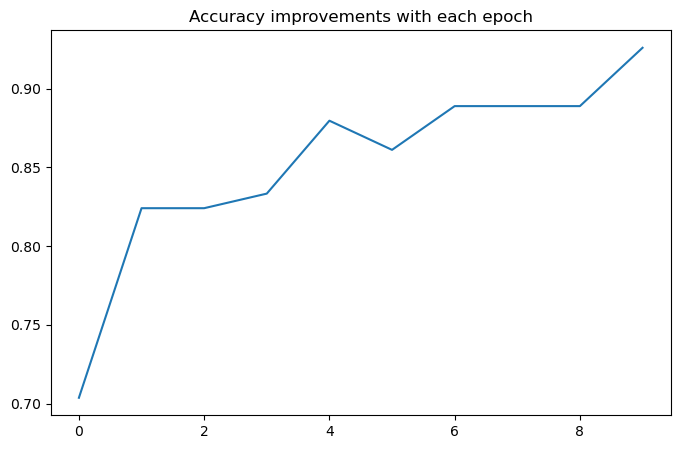


Evaluation against Test Dataset :
-------------------------
1/1 [==============================] - 0s 999us/step - loss: 0.1521 - accuracy: 0.8667


[0.15210625529289246, 0.8666666746139526]

In [11]:
# Make it verbose so we can see the progress
VERBOSE=1

# Setup Hyper Parameters for training

# Se Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n--------------------")

# Fit the model. This willperform the entire training cycle, including
# forward propagation, loss computation, backward propagation, and gradient descent.
# Execute for the specified batch sizeds and epoch
# Perform validation after each epoch
history=model.fit(X_train, 
                  y_train,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  verbose=VERBOSE,
                  validation_split=VALIDATION_SPLIT)

print("\nAccuracy during training :\n---------------------")
import matplotlib.pyplot as plt

# Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with each epoch")
plt.show()

# Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n-------------------------")
model.evaluate(X_test, y_test)

## Saving and Loading Models
##### The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction.

In [13]:
# Saving a model
model.save("iris_save")

# Loading a Model
loaded_model = keras.models.load_model("iris_save")

# Print Model Summary
loaded_model.summary()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: iris_save\assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-Layer-1 (Dense)       (None, 128)               640       
_________________________________________________________________
Hidden-Layer-2 (Dense)       (None, 128)               16512     
_________________________________________________________________
Output-Layer (Dense)         (None, 3)                 387       
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


## Predictions with Deep Learning Models

In [18]:
# Raw prediction data
prediction_input= [[6.6,3.,4.4, 1.4]]

# Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

# Get raw prediciton probabilities
raw_prediction = model.predict(prediction_input)
print("Raw Prediction output (Probabilities) ", raw_prediction)

# Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

Raw Prediction output (Probabilities)  [[7.53562546e-09 1.07821515e-02 9.89217877e-01]]
Prediction is  ['Iris-virginica']
